In [22]:
# Load in assignments_V1.csv as dataframe 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load in assignments_v1.csv as dataframe
df = pd.read_csv('assignments_v1.csv')

# Load in assignments_v2_0.csv as dataframe 
df2 = pd.read_csv('assignments_v2_0.csv')

# Load in assignments_v3_0.csv as dataframe 
df3 = pd.read_csv('assignments_v3_0.csv') 

# Load in assignments_v4_0.csv as dataframe
df4 = pd.read_csv('/home/aparna/DATA/aparnakumar/github clone/SEACells/results10/5000_cells/assignments_v4_1701759197.49185.csv')

In [23]:
df.head()

,index,SEACell
0,cell_106997,SEACell-29
1,cell_113929,SEACell-55
2,cell_17885,SEACell-41
3,cell_58734,SEACell-43
4,cell_57629,SEACell-10


In [24]:
pairs = pd.DataFrame({"Original Version": df["SEACell"], "Sparse, no GPU": df2["SEACell"], "Dense, GPU": df3["SEACell"], "Sparse, GPU": df4["SEACell"]} )
pairs.reset_index(drop=True)

,Original Version,"Sparse, no GPU","Dense, GPU","Sparse, GPU"
0,SEACell-29,SEACell-57,SEACell-57,SEACell-14
1,SEACell-55,SEACell-55,SEACell-55,SEACell-55
2,SEACell-41,SEACell-25,SEACell-25,SEACell-25
3,SEACell-43,SEACell-43,SEACell-43,SEACell-43
4,SEACell-10,SEACell-14,SEACell-14,SEACell-17
...,...,...,...,...
4995,SEACell-33,SEACell-33,SEACell-33,SEACell-33
4996,SEACell-26,SEACell-26,SEACell-26,SEACell-26
4997,SEACell-47,SEACell-47,SEACell-47,SEACell-47
4998,SEACell-10,SEACell-10,SEACell-10,SEACell-10


In [17]:
def plot_heatmap(df): 
    # Get column names 1 and 2 
    col1 = df.columns[0]
    col2 = df.columns[1] 

    # Group the data by the two columns and get the size 
    SEACell_pairings = df.groupby([col1, col2], as_index=False).size() 

    # Get the heatmap data 
    heatmap_data = pd.pivot_table(SEACell_pairings, values='size', index=[col1], columns=[col2])
    heatmap_data = heatmap_data.fillna(0) 

    # Plot the heatmap
    sns.heatmap(heatmap_data)

In [20]:
# Create a new dataframe comp1 that's a subset of pairs 
# In comp1, we only want to look at the original version and the sparse, no GPU version 

comp1 = pairs[["Original Version", "Sparse, no GPU"]]

# Create a new dataframe comp2 that's a subset of pairs 
# In comp2, we only want to look at the original version and the dense, GPU version

comp2 = pairs[["Original Version", "Dense, GPU"]]

# Create a new dataframe comp3 that's a subset of pairs
# In comp3, we only want to look at the original version and the sparse, GPU version

comp3 = pairs[["Original Version", "Sparse, GPU"]]


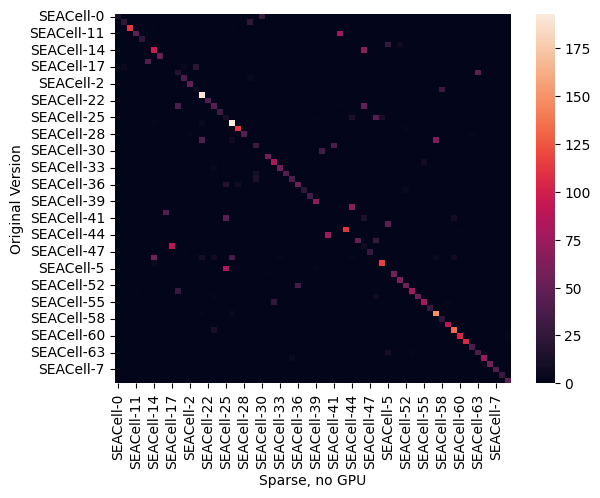

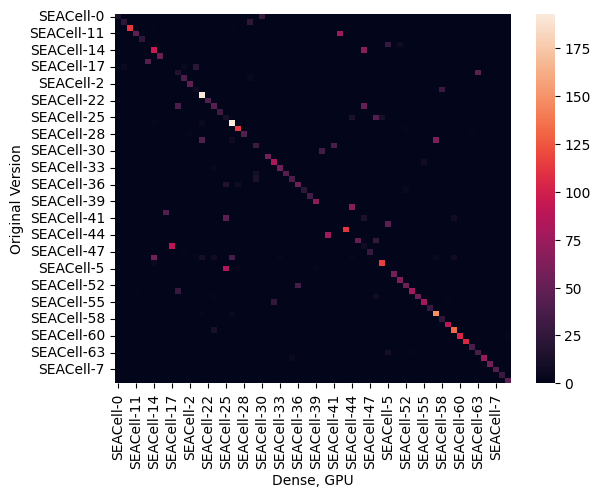

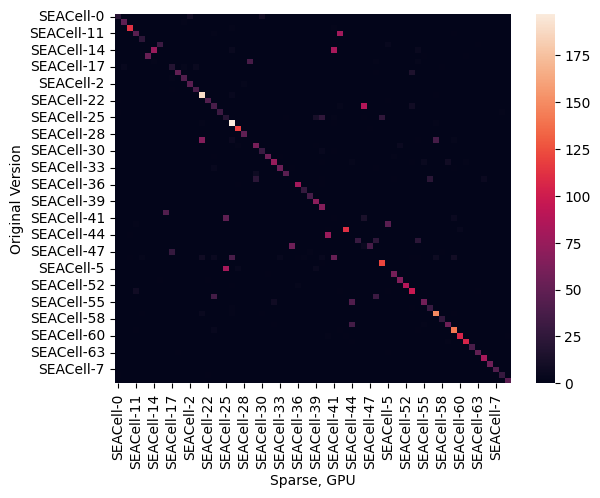

In [21]:
for comp in [comp1, comp2, comp3]: 
    plot_heatmap(comp)
    plt.show()